In [31]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA  # Import PCA
from skimage.feature import hog

def extract_hog_features(image):
    # Extract HOG features from the image
    hog_features = hog(image, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=False)
    return hog_features

def load_images(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img)
            labels.append(label)
    return images, labels

def preprocess_images(images, target_size=(64, 128)):
    hog_features_list = []
    for image in images:
        # Resize the image to the target size
        resized_img = cv2.resize(image, target_size)
        # Extract HOG features
        hog_features = extract_hog_features(resized_img)
        hog_features_list.append(hog_features)
    return hog_features_list

In [32]:
folder_path = './Images/'  # Replace this with the path to your dataset folder
images, labels = load_images(folder_path)
hog_features = preprocess_images(images)  # Extract HOG features

In [38]:
# Convert HOG features to numpy array
X = np.array(hog_features)
# Apply PCA with one principal component
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [40]:
# Apply K-Means clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', n_init='auto')
kmeans.fit(X_pca)
# Assign labels to clusters
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print("Silhouette Score:", silhouette_avg)
# For demonstration purposes, check cluster distribution
unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
cluster_distribution = dict(zip(unique_clusters, counts))
print("Cluster Distribution:", cluster_distribution)
    # Print cluster labels for each distribution
for cluster_num, count in cluster_distribution.items():
    # Extract indices for a specific cluster
    indices = np.where(cluster_labels == cluster_num)[0]
    print(f"\nCluster {cluster_num} Labels (Count: {count}):")
    print(cluster_labels[indices])

Silhouette Score: 0.3400073816484794
Cluster Distribution: {0: 283, 1: 94, 2: 180, 3: 62, 4: 198}

Cluster 0 Labels (Count: 283):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Cluster 1 Labels (Count: 94):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Cluster 2 Labels (Count: 180):
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

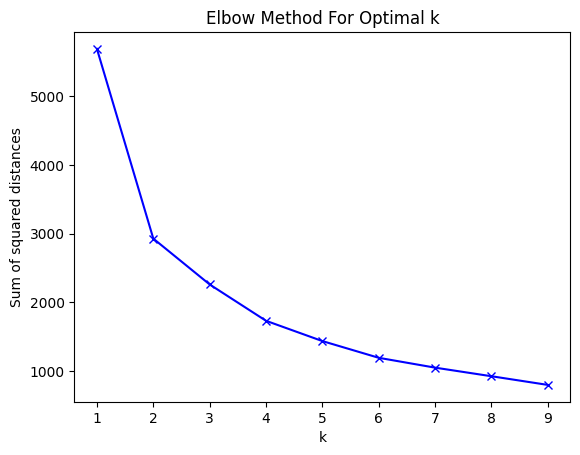

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate sum of squared distances
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init to 10
    km = km.fit(X_pca)
    ssd.append(km.inertia_)
    
# Plot sum of squared distances / elbow curve
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

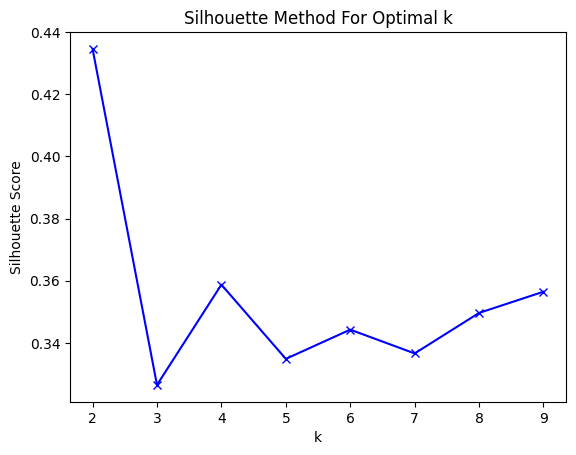

In [36]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
sil_scores = []
K = range(2,10)  # silhouette_score requires at least 2 clusters
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(X_pca)
    labels = km.labels_
    sil_scores.append(silhouette_score(X_pca, labels))

# Plot silhouette scores
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()